In [8]:
# Usual imports
import matplotlib.pyplot as plt               # for plotting
import numpy as np                            # matrix handling

import os

In [9]:
# To do animations
from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [10]:
! gfortran rg.f90 -Wall -llapack -frecursive -ffpe-summary='none'

In [18]:
def plotgs(N,nit,nlambdas):
    lambdas = np.linspace(0,3,nlambdas)
    
    # Name of the folder is pretty standard
    folder = 'N'+str(N)+'nit'+str(nit)
    
    # Execute program for every lam in lambdas
    for lam in lambdas:
        filename = str(round(lam,3))
        ! echo $N $nit $lam $folder $filename | ./a.out >/dev/null
    
    y = []
    for i in range(len(lambdas)):
        filename = str(round(lambdas[i],3))+'.csv'
        gs_en = np.genfromtxt('./data/'+folder+'/'+filename)[-1]
        y.append(gs_en)
        
    plt.plot(lambdas,y,label=N)
    
def plotgs_convergence(frame_num):
    # You already need the data, you can do that by running plotgs with the same parameters
    x = np.linspace(0,3,nlambdas)    
    y = []
    for i in range(len(x)):
        filename = str(round(x[i],3))+'.csv'
        gs_en = np.genfromtxt('./data/'+folder+'/'+filename)[frame_num]
        y.append(gs_en)
    line.set_data((x,y))
    
    return line,


In [48]:
N = 4
nit = 60
nlambdas = 40
folder = 'N'+str(N)+'nit'+str(nit)

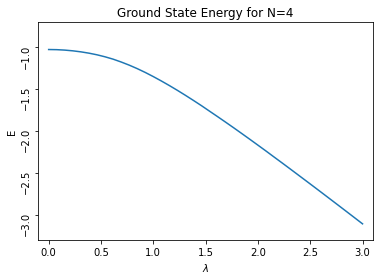

In [50]:
plotgs(N,nit,nlambdas)
plt.xlim(-.1, 3.1)
plt.ylim(-3.3, -.7)
plt.title('Ground State Energy for N='+str(N))
plt.xlabel(r'$\lambda$')
plt.ylabel('E')
plt.yticks(rotation=90)
plt.grid(False)

In [43]:
fig, ax = plt.subplots()
line, = ax.plot([])

ax.set_xlim(-.1, 3.1)
ax.set_ylim(-3.3, -.7)
anim = FuncAnimation(fig, plotgs_convergence, frames=nit, interval=10)
plt.title('Ground State Energy for N='+str(N))
plt.xlabel(r'$\lambda$')
plt.ylabel('E')
plt.yticks(rotation=90)
plt.close(anim._fig)

# Call function to display the animation
HTML(anim.to_html5_video())